# 

In [1]:
# Visualizing drawdown



In [2]:
import numpy as np
import yfinance as yf

In [3]:
data = yf.download("ES=F")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,ES=F,ES=F,ES=F,ES=F,ES=F
Date,,,,,
2000-09-18,1467.50,1489.75,1462.25,1485.25,104794
2000-09-19,1478.50,1482.75,1466.75,1467.00,103371
2000-09-20,1469.50,1480.50,1450.25,1478.75,109667
2000-09-21,1469.50,1474.00,1455.50,1470.25,98528
2000-09-22,1468.50,1471.00,1436.75,1454.75,97416
...,...,...,...,...,...
2025-06-05,5946.00,6016.50,5928.75,5974.25,0
2025-06-06,6006.75,6025.00,5930.00,5931.75,1278102


In [5]:
daily_returns = data['Close'].pct_change()

In [6]:
daily_returns

Ticker,ES=F
Date,
2000-09-18,NaN
2000-09-19,0.007496
2000-09-20,-0.006087
2000-09-21,0.000000
2000-09-22,-0.000681
...,...
2025-06-05,-0.005852
2025-06-06,0.010217
2025-06-09,0.000583


In [8]:
prices = data['Close']

<Axes: xlabel='Date'>

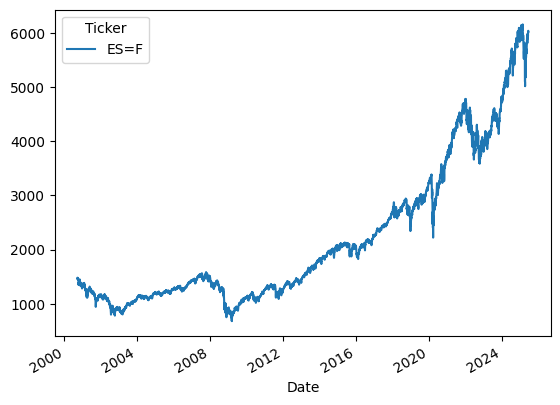

In [9]:
prices.plot()

In [10]:
returns = prices.pct_change()

In [11]:
cum_returns = (1 + returns).cumprod()

In [14]:
returns.tail()

Ticker,ES=F
Date,
2025-06-05,-0.005852
2025-06-06,0.010217
2025-06-09,0.000583
2025-06-10,0.005782
2025-06-11,-0.002564


In [15]:
cum_returns.tail()

Ticker,ES=F
Date,
2025-06-05,4.051789
2025-06-06,4.093186
2025-06-09,4.095571
2025-06-10,4.119250
2025-06-11,4.108688


<Axes: xlabel='Date'>

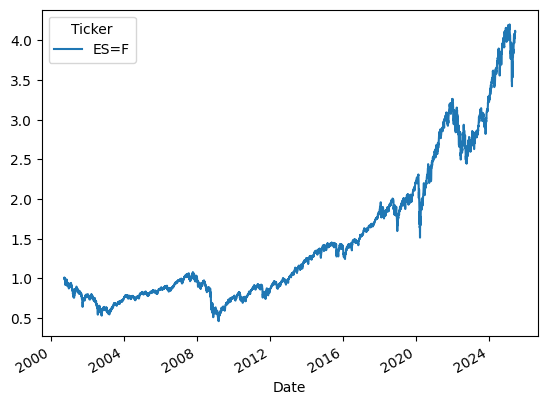

In [16]:
cum_returns.plot()

In [21]:
cum_returns_max = cum_returns.cummax()

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
cum_returns.head()

Ticker,ES=F
Date,
2000-09-18,NaN
2000-09-19,1.007496
2000-09-20,1.001363
2000-09-21,1.001363
2000-09-22,1.000681


In [38]:
cum_returns_series = cum_returns['ES=F']
cum_returns_max_series = cum_returns_max['ES=F']

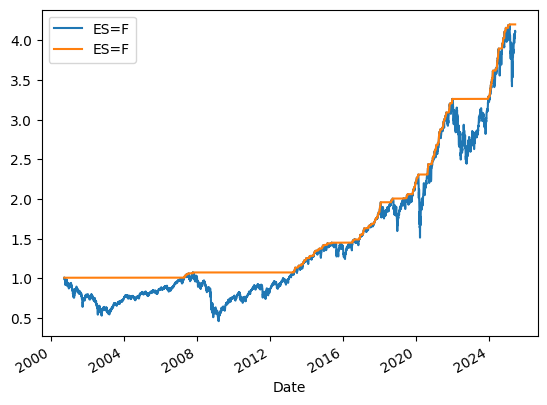

In [39]:
# cum_returns.plot()
# cum_returns_max.plot()
# plt.show()

ax = cum_returns.plot(label='Cumulative Returns')  # first line
cum_returns_max.plot(ax=ax, label='Rolling Max')   # second line on same axis
plt.legend()
plt.show()

In [40]:
drawdown = (cum_returns_max - cum_returns) / cum_returns_max

2009-03-09 00:00:00


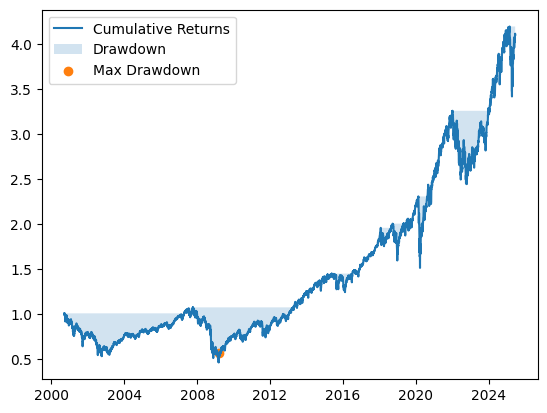

In [58]:
fig, ax = plt.subplots()
ax.plot(cum_returns_series.index, cum_returns_series, label='Cumulative Returns')
ax.fill_between(cum_returns_max_series.index, cum_returns_series, cum_returns_max_series, alpha=0.2, label='Drawdown')

max_drawdown_idx = drawdown.idxmax()['ES=F']
print(max_drawdown_idx)
max_drawdown_value = drawdown.loc[max_drawdown_idx, 'ES=F']
ax.scatter(max_drawdown_idx, max_drawdown_value, label="Max Drawdown")
plt.legend()
plt.show()

In [15]:
returns_kurtosis

Ticker
ES=F    15.607551
dtype: float64